## Unit commitment problem

The ucp is a mixed- integer combinatorial optimization problem including uncertain supply from renewable energies (e.g. wind, solar), potential machine failure or demand. The objective is to allocate power ressources to match a certain demand at all times producing minimal cost.

In this notebook we show how to formulate the optimization problem as a QUBO that can lateron solved with quantum algorithms, quantum annealing, quantum-inspired methods or classical heuristics

In [34]:
# import pygrnd and other libraries needed
# we build on top of the open source framework qiskit (qiskit.org)
import pygrnd

from pygrnd.qc.helper import *
from pygrnd.qc.brm import brm
from pygrnd.qc.brm_oracle import brmoracle
from pygrnd.qc.QAE import qae

from pygrnd.optimize.sat_ucp import *
from pygrnd.optimize.meritorder import *

from pygrnd.optimize.bruteforce import *
from pygrnd.optimize.MonteCarloSolver import *
from pygrnd.optimize.qaoa import *

from qiskit import execute
from qiskit import Aer

from math import pi
import math
import cmath
import random
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.stats import norm
import networkx as nx
from IPython.display import Image
import timeit

In [35]:
## XXXS

cost=[2,1]
demand=[1]
minup=[1,1]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]

start_time = timeit.default_timer()
xxxs,mapsxxxs=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(xxxs),"x",len(xxxs))
print(xxxs)
print(mapsxxxs)

bestenergy,res=dwaveGreedySolver(xxxs,1000)
print(bestenergy,res)

SAT formulation for constraint qubo:  [[-2, 1], [-1, 2], [-4, 3], [-3, 4]]
Number of formulas:  4
maxVariable:  4
Constraint QUBO:
  [[ 2. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2. -4.]
 [ 0.  0.  0.  2.]]
Cost QUBO:
  [[ 4. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3. -4.]
 [ 0.  0.  0.  2.]]
penaltyDemand:  100
Demand QUBO:
   [[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
Duration in seconds: 0.0022689440002068295
Size of Qubo:  4 x 4
[[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
[[0], [2]]
#nonzeros/#quboEntries 7 / 16
sparsity 0.4375
-99.0 [0, 0, 1, 1]


In [36]:
## XXS

cost=[2,1]
demand=[1]
minup=[1,1]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]


start_time = timeit.default_timer()


xxs,mapsxxs=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
#xxs,mapsxxs=createSATquboPenalty(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost,100,1,1,1) #100,50,10,10

end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(xxs),"x",len(xxs))
print(xxs)
print(mapsxxs)

bestenergyxxs,resxxs=dwaveGreedySolver(xxs,1000)
print(bestenergyxxs,resxxs)

SAT formulation for constraint qubo:  [[-2, 1], [-1, 2], [-4, 3], [-3, 4]]
Number of formulas:  4
maxVariable:  4
Constraint QUBO:
  [[ 2. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2. -4.]
 [ 0.  0.  0.  2.]]
Cost QUBO:
  [[ 4. -4.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3. -4.]
 [ 0.  0.  0.  2.]]
penaltyDemand:  100
Demand QUBO:
   [[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
Duration in seconds: 0.0017852540004241746
Size of Qubo:  4 x 4
[[-96.  -4. 200.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -97.  -4.]
 [  0.   0.   0.   2.]]
[[0], [2]]
#nonzeros/#quboEntries 7 / 16
sparsity 0.4375
-99.0 [0, 0, 1, 1]


In [37]:
## XS

cost=[2,1]

demand=[1,2,1]
#demand=[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1]
#minup=[2,3]
minup=[2,3]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]

start_time = timeit.default_timer()

xs,mapsxs=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
#xs,mapsxs=createSATquboPenalty(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost,100,1,1,1) #100,50,10,10
end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(xs),"x",len(xs))
print(xs)
print(mapsxs)

bestenergyxs,resxs=dwaveGreedySolver(xs,1000)
print(bestenergyxs,resxs)

SAT formulation for constraint qubo:  [[-4, 1], [-4, 2], [-5, 2], [-5, 3], [-1, 4], [-2, 4, 5], [-3, 5], [-9, 6], [-9, 7], [-9, 8], [-6, 9], [-7, 9], [-8, 9]]
Number of formulas:  13
maxVariable:  9
Constraint QUBO:
  [[ 2.  0.  0. -4.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -4. -2.  0.  0.  0.  0.  3.]
 [ 0.  0.  2.  0. -4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0. -3.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  2.  0.  0. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -3.]]
Cost QUBO:
  [[ 4. -1.  0. -4.  0.  0.  0.  0.  0.  0.]
 [ 0.  2. -1. -4. -2.  0.  0.  0.  0.  3.]
 [ 0.  0.  5.  0. -4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0. -3.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  3. -1.  0. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  4. -1. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4. -4.

In [38]:
dffull, solutionVector, bufferSupply, solutionCostTotal, TotalSupply=printSolution(resxs, mapsxs, cost, minup, demand, maxgen)
total_violate, ratio_violate, num_constraints, unmatched_demand, unmatched_demand_ratio = checkMinupMinDownMaxupMaxdownChecks(minup,mindown,maxup,maxdown,solutionVector,TotalSupply,demand)

Total costs of production:  5
['010', '111']
unit:  0  --> Minup VIOLATION -1
unit:  1  --> Minup Correct
no mindown constraint
no mindown constraint
no maxup constraint
no maxup constraint
no maxdown constraint
no maxdown constraint
demand                 = supply  --> constraint matched
unmatched demand ratio =  1.0
Demand                 =  1 | Supply =  1
demand                 = supply  --> constraint matched
unmatched demand ratio =  1.0
Demand                 =  2 | Supply =  2
demand                 = supply  --> constraint matched
unmatched demand ratio =  1.0
Demand                 =  1 | Supply =  1
Number of demand constraint breaks =  0


In [39]:
## S

cost=[2,1]
demand=[1,2,1,2,1]
minup=[2,3]
mindown=[0,0]
maxup=[0,0]
maxdown=[0,0]
maxgen=[1,1]
startcost=[1,1]

start_time = timeit.default_timer()
#s,mapss=createQUBOCostMaxgenDemandMinupMindownMaxupMaxDownStartcostIterativeSort(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost)
## createSATqubo(cost,maxgen,demand,minup,mindown,maxup,maxdown,startcost,PDemand,PCost,PStart,PConstr)
s,mapss=createSATqubo(cost, maxgen, demand, minup, mindown, maxup, maxdown, startcost) #100,50,10,10
end_time = timeit.default_timer()
print('Duration in seconds: {}'.format(end_time - start_time))
print("Size of Qubo: ",len(s),"x",len(s))
print(mapss)

bestenergys,ress=dwaveGreedySolver(s,1000)
print(bestenergys,ress)

dffull, solutionVector, bufferSupply, solutionCostTotal, TotalSupply=printSolution(ress, mapss, cost, minup, demand, maxgen)
total_violate, ratio_violate, num_constraints, unmatched_demand, unmatched_demand_ratio = checkMinupMinDownMaxupMaxdownChecks(minup,mindown,maxup,maxdown,solutionVector,TotalSupply,demand)

SAT formulation for constraint qubo:  [[-6, 1], [-6, 2], [-7, 2], [-7, 3], [-8, 3], [-8, 4], [-9, 4], [-9, 5], [-1, 6], [-2, 6, 7], [-3, 7, 8], [-4, 8, 9], [-5, 9], [-15, 10], [-15, 11], [-15, 12], [-16, 11], [-16, 12], [-16, 13], [-17, 12], [-17, 13], [-17, 14], [-10, 15], [-11, 15, 16], [-12, 15, 16, 17], [-13, 16, 17], [-14, 17]]
Number of formulas:  27
maxVariable:  17
Constraint QUBO:
  [[ 2.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -4. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0. -4. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0. -4. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.
   0.  0.  0.  0.  0.  0.]

## new we solve the QUBO with the inbuild QAOA solver

In [40]:
import pygrnd
from pygrnd.optimize.qaoa import *
from pygrnd.optimize.sat_ucp import *
from qiskit.visualization import plot_histogram


import dimod
import qiskit
import numpy as np

0.0 0.0 1000 -96.0
0.0 0.3141592653589793 0011 -99.0


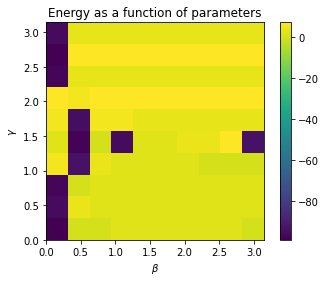

In [41]:
## show solutions landscape
qaoaLandscape(xxs,10,1000)

In [42]:
# solve example set xxs
# xs is a 4x4 qubo that requires 4 qubits
vec, counts, obj, prob, qc, res1, res2, bestBetas, bestGammas = QAOAoptimizeMaxCount(xxs,5,1000)

Selected device:  qasm_simulator  with  1000 shots
Trying  5  layer
Generating inital random parameters beta and gamma
Starting with betas:  [3.0316061425719845, -0.1519250911700416, -2.060103847622278, 1.6365896789072494, -5.345778860338202]
Starting with gammas:  [4.000753853832176, 5.4180642003749675, 1.9802957639121512, -6.1007873218954725, -5.06725191258352]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Beta [ 3.03160614 -0.15192509 -2.06010385  1.63658968 -5.34577886] Best Gamma [ 4.00075385  5.4180642   1.98029576 -6.40582669 -5.06725191]
Now run the QAOA with the found parameters
----------------------------------------------
Optimum =  -98.0  with probability =  0.274
----------------------------------------------
Depth: 67
Gate counts: OrderedDict([('rz', 35), ('cx', 30), ('ry', 20), ('barrier', 11), ('h', 4), ('measure', 4)])


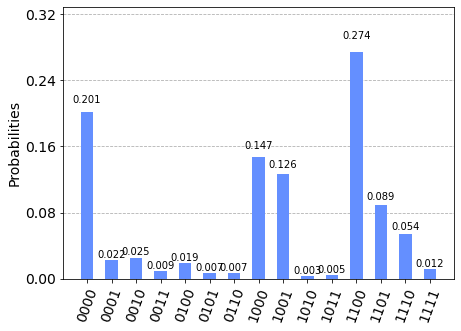

In [43]:
plot_histogram(counts)

In [44]:
## do not approx expectation value by average over all solutions but only use the max count bitstring

Nmax=[]
probamax=[]
Optmax=[]
for i in range(1,10):
    vec, counts, obj, prob, qc, res1, res2, bestBetas, bestGammas = QAOAoptimizeMaxCount(xxs,i,1000)
    Nmax.append(i)
    probamax.append(prob)
    Optmax.append(obj)

Selected device:  qasm_simulator  with  1000 shots
Trying  1  layer
Generating inital random parameters beta and gamma
Starting with betas:  [-0.7667554870727287]
Starting with gammas:  [4.5194823454833575]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Beta [-0.84534792] Best Gamma [4.50818364]
Now run the QAOA with the found parameters
----------------------------------------------
Optimum =  5.0  with probability =  0.161
----------------------------------------------
Depth: 15
Gate counts: OrderedDict([('rz', 7), ('cx', 6), ('h', 4), ('ry', 4), ('measure', 4), ('barrier', 3)])
Selected device:  qasm_simulator  with  1000 shots
Trying  2  layer
Generating inital random parameters beta and gamma
Starting with betas:  [0.037155049742974455, 1.2405130243676892]
Starting with gammas:  [-1.680187571835848, 4.85981031127122]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Bet

In [45]:
bestenergyxxs

-99.0

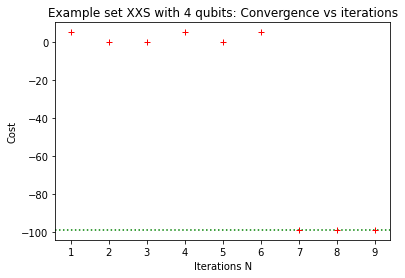

In [46]:
plt.axhline(y=bestenergyxxs, color='g', linestyle=':')
plt.ylabel("Cost")
plt.xlabel("Iterations N")
plt.title("Example set XXS with 4 qubits: Convergence vs iterations")
plt.plot(Nmax,Optmax,'r+')

In [47]:
## approximate the expectation value with all measured bitstrings and take the average
#vec, counts, expectationValue, prob, qc, res1, res2, bestBetas, bestGammas, optimum = QAOAoptimizeExpectation(xxs,5,1000)

Nexp=[]
probaexp=[]
Optexp=[]
expVexp=[]

for i in range(1,10):
    vec, counts, expectationValue, prob, qc, res1, res2, bestBetas, bestGammas, optimum = QAOAoptimizeExpectation(xxs,i,1000)
    Nexp.append(i)
    probaexp.append(prob)
    expVexp.append(expectationValue)
    Optexp.append(optimum)

Selected device:  qasm_simulator  with  1000 shots
Trying  1  layer
Generating inital random parameters beta and gamma
Starting with betas:  [-2.2949524076404204]
Starting with gammas:  [1.0057312668756282]
Optimize FIRST round with random initialisation
Optimize SECOND round with the found initialization
Best Beta [-1.91825229] Best Gamma [1.3494441]
Now run the QAOA with the found parameters
----------------------------------------------
Expectation value =  -45.916
----------------------------------------------
Optimum =  2.0  with probability =  0.154
----------------------------------------------
Depth: 15
Gate counts: OrderedDict([('rz', 7), ('cx', 6), ('h', 4), ('ry', 4), ('measure', 4), ('barrier', 3)])
Selected device:  qasm_simulator  with  1000 shots
Trying  2  layer
Generating inital random parameters beta and gamma
Starting with betas:  [-3.4171331931550886, -5.968806991022075]
Starting with gammas:  [5.563187289718794, 3.685419923888709]
Optimize FIRST round with random i

Best Beta [ 0.12893305 -1.12701925  0.47559974  3.54636413  4.00736317  5.6526842
 -4.48477679  1.31487418 -1.09109445] Best Gamma [-0.50433483  3.11916511 -5.06507953 -0.39463995  5.87406004 -5.4550044
  3.85055358  3.55086832  4.24754685]
Now run the QAOA with the found parameters
----------------------------------------------
Expectation value =  -68.636
----------------------------------------------
Optimum =  -97.0  with probability =  0.244
----------------------------------------------
Depth: 119
Gate counts: OrderedDict([('rz', 63), ('cx', 54), ('ry', 36), ('barrier', 19), ('h', 4), ('measure', 4)])


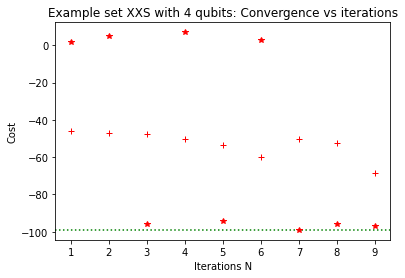

In [49]:
plt.axhline(y=bestenergyxxs, color='g', linestyle=':')
plt.ylabel("Cost")
plt.xlabel("Iterations N")
plt.title("Example set XXS with 4 qubits: Convergence vs iterations")
plt.plot(Nexp,expVexp,'r+')
plt.plot(Nexp,Optexp,'b*')

Text(0.5, 1.0, 'Example set XXS with 4 qubits: Convergence vs iterations')

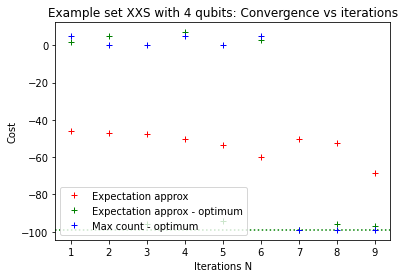

In [58]:
plt.axhline(y=bestenergyxxs, color='g', linestyle=':')
plt.plot(Nexp,expVexp,'r+',label="Expectation approx")
plt.plot(Nexp,Optexp,'g+',label="Expectation approx - optimum")
plt.plot(Nmax,Optmax,'b+',label="Max count - optimum")
plt.legend()
plt.ylabel("Cost")
plt.xlabel("Iterations N")
plt.title("Example set XXS with 4 qubits: Convergence vs iterations")